In [1]:
! pip install biopython 

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: C:\Users\khush\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [9]:
# Step1: Fetch protein sequence from NCBI 
from Bio import Entrez, SeqIO

Entrez.email= "khushidriven@gmail.com"

proteins = { "Human cytochrome c": "NP_061820.1",
            "Yeast cytochrome c": "NP_009305.1"
}

seqs={}

for species, acc in proteins.items():
    handle= Entrez.efetch(db= "protein", id= acc, rettype= "fasta", retmode= "text")
    record= SeqIO.read(handle, "fasta")
    handle.close()
    seqs[species] = record.seq
    
print(seqs)


{'Human cytochrome c': Seq('MGDVEKGKKIFIMKCSQCHTVEKGGKHKTGPNLHGLFGRKTGQAPGYSYTAANK...TNE'), 'Yeast cytochrome c': Seq('MVQRWLYSTNAKDIAVLYFMLAIFSGMAGTAMSLIIRLELAAPGSQYLHGNSQL...VQS')}


In [10]:
# Step2: Pairwise protein sequence alignment
from Bio import pairwise2
from Bio.pairwise2 import format_alignment 

alignment = pairwise2.align.globalxx(seqs["Human cytochrome c"], seqs["Yeast cytochrome c"])

best_alignment= alignment[0]
print(format_alignment(*best_alignment))

MG-----------D--V----------------------EK----GKK----------------------IF-------I----------MK------------------------C---SQCHT-VEK-G-GKHKTG----PN-L-----H-G----L--F-----------G-----------RKT-GQA------PGY----SY---TA-----------A---------NK-N----------------------------------------------K----G-I--------I-------W-------GE-D--T----------------------L-------------ME-Y----LE--------------NPKK----------Y--------------I-----------P---GT-----KM---I-F--------V--------GIKKKEE----RA---DL-------------I----A--------Y-L----------K---K------A-------T--N---------E-------------------
|            |  |                      |     |                        ||       |          |                         |   |   | ||  | |   ||    |  |     | |    |  |           |           | | |        |      |    ||           |         |  |                                              |    | |        |       |       |  |  |                      |             |  |    |               |             |              |           |   |  

In [11]:
# step3: % Identity
seqA, seqB, score, start, end = best_alignment

matches = sum(1 for a, b in zip(seqA, seqB) if a == b)
identity = (matches / len(seqA)) * 100

print(f"Sequence Identity: {identity:.2f}%")

Sequence Identity: 12.30%


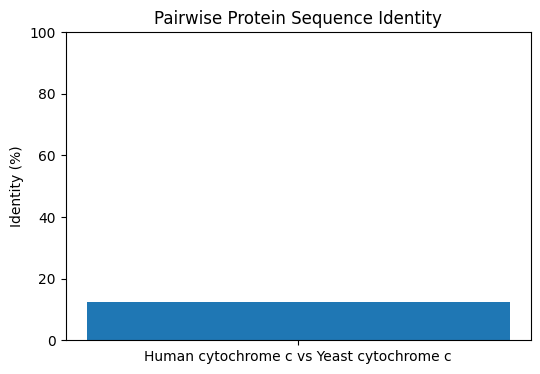

In [19]:
# Visualization of sequence identity

import pandas as pd
import matplotlib.pyplot as plt 

identity_df= pd.DataFrame({"Protein Pair": ["Human cytochrome c vs Yeast cytochrome c"],
                           "Sequence Identity (%)": [identity]})

#Plot
plt.figure(figsize=(6,4))
plt.bar(identity_df["Protein Pair"], identity_df["Sequence Identity (%)"])
plt.title("Pairwise Protein Sequence Identity")
plt.ylabel("Identity (%)")
plt.ylim(0, 100)
plt.show()




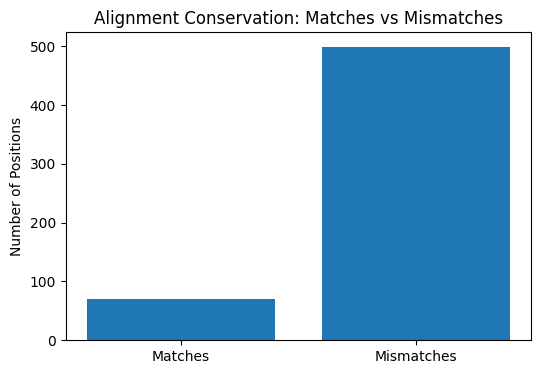

In [21]:
# Visualization Match vs Mismatch 
match_count= matches 
mismatch_count = len(seqA)-matches

df_match = pd.DataFrame({"Type": ["Matches", "Mismatches"],
                          "Count": [match_count, mismatch_count]})

plt.figure(figsize=(6,4))
plt.bar(df_match["Type"], df_match["Count"])
plt.title("Alignment Conservation: Matches vs Mismatches")
plt.ylabel("Number of Positions")
plt.show()






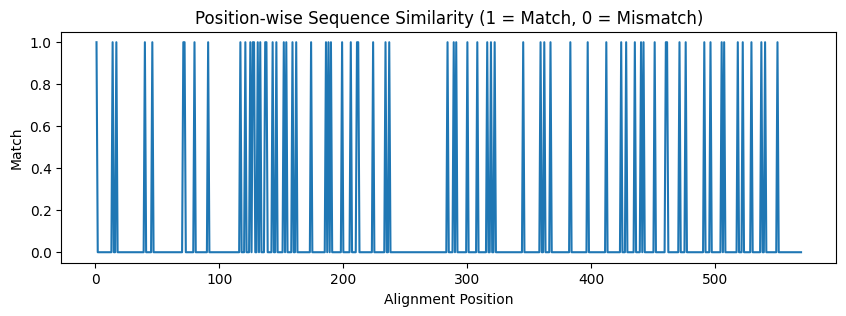

In [24]:
# Visualization Position-wise similarity plot 
similarity= [1 if a==b else 0 for a,b in zip(seqA,seqB)]

similarity_df=pd.DataFrame({"Position": range(1,len(similarity)+1),
                            "Match": similarity})

plt.figure(figsize=(10,3))
plt.plot(similarity_df["Position"], similarity_df["Match"])
plt.title("Position-wise Sequence Similarity (1 = Match, 0 = Mismatch)")
plt.xlabel("Alignment Position")
plt.ylabel("Match")
plt.show()



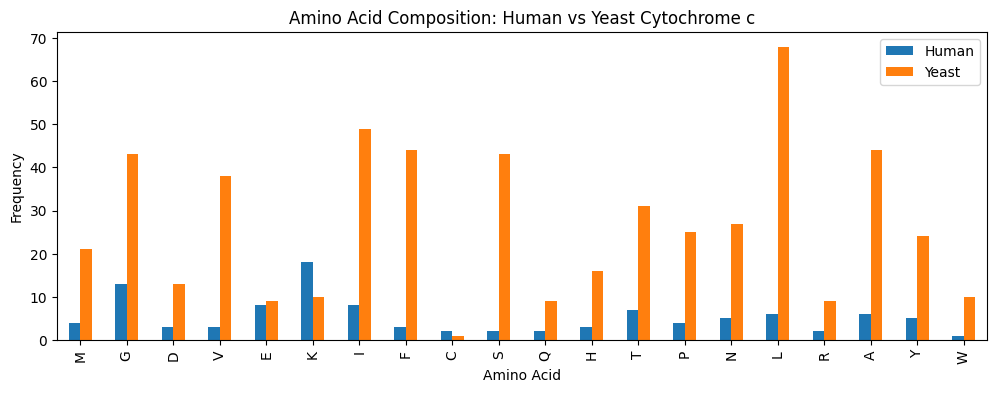

In [ ]:
#Visualization for Amino acid comparison 
from collections import Counter 

human_counts= Counter(str(seqs["Human cytochrome c"]))
yeast_counts= Counter(str(seqs["Yeast cytochrome c"]))

amino_acid_df= pd.DataFrame({ "Human": human_counts,
    "Yeast": yeast_counts
}).fillna(0)

amino_acid_df.plot(kind="bar", figsize=(12,4))
plt.title("Amino Acid Composition: Human vs Yeast Cytochrome c")
plt.xlabel("Amino Acid")
plt.ylabel("Frequency")
plt.show()